In [4]:
import numpy as np
from sklearn.datasets import load_breast_cancer, make_classification
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [5]:
# X, y = load_breast_cancer(return_X_y=True)
data = make_classification(n_samples = 50, n_features=2, n_informative=2, n_redundant=0)
X = data[0]
y = data[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [6]:
X.min(axis=0), X.max(axis=0)

(array([-3.04835995, -3.17785679]), array([ 2.51753704,  1.73790271]))

In [7]:
# #testing
# test = np.array([0,1,1,0,1,2,2,3,3,3,3,3,3])

# classes = list(set(test))
# votes = np.bincount(test)
# votes_proba = votes / len(test)
# rank = votes.argsort()
# winner = classes[rank[-1]]
# winner

# np.bincount(test).argmax()



# dist = cdist(X_test, X_train)
# dist = dist.argsort()
# votes = y_train[dist.argsort()][:,:5]
# votes = np.apply_along_axis(np.bincount, 1, votes)
# votes.argmax(axis=1)

In [12]:
class KNeighborsClassifierML:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    

    def predict(self, Xnew, plotting=False):
        #for every new observation, measure the distance to each known point
        dist = cdist(Xnew, self.X_train)
        dist = dist.argsort() # creates an index used to sort
        votes = self.y_train[dist][:,:self.k] #sort y_train and subset to first k
        votes = np.apply_along_axis(np.bincount, 1, votes) # count votes
        preds = votes.argmax(axis=1) #decide votes
        
        if plotting:
            #starting data
            plt.show() #resets the figure
            plt.scatter(x=self.X_train[:,0], y=self.X_train[:,1], c=['c','m'])
            plt.xticks([])
            plt.yticks([])
            plt.xlim((-3.5, 2.5))
            plt.ylim((-3.5, 2.5))

            plt.title("Training Data")
            plt.savefig('assets/plots_for_gifs/kneighbors/kneighbors_001')
            plt.show()

            # layer in Xnew
            plt.scatter(x=self.X_train[:,0], y=self.X_train[:,1], c=['c','m'])
            plt.scatter(x=Xnew[:,0], y=Xnew[:,1], c=['r'])
            plt.xticks([])
            plt.yticks([])
            plt.xlim((-3.5, 2.5))
            plt.ylim((-3.5, 2.5))
            plt.title("Add in New Data")
            plt.savefig('assets/plots_for_gifs/kneighbors/kneighbors_002')

            plt.show()
            
            # draw distances
            plt.scatter(x=self.X_train[:,0], y=self.X_train[:,1], c=['c','m'])
            plt.scatter(x=Xnew[:,0], y=Xnew[:,1], c=['r'])
            
            for i in range(len(Xnew)):
                for j in range(len(self.X_train)):   
                    x1 = Xnew[i,0]
                    y1 = Xnew[i,1]
                    x2 = self.X_train[j,0]
                    y2 = self.X_train[j,1]
                    plt.plot([x1, x2], [y1, y2], color='r', alpha = 0.25)
            plt.title("Measure distance between New Data and Training Data")
            plt.xticks([])
            plt.yticks([])
            plt.xlim((-3.5, 2.5))
            plt.ylim((-3.5, 2.5))
            plt.savefig('assets/plots_for_gifs/kneighbors/kneighbors_003')
            plt.show()
            
            # draw k distances
            plt.scatter(x=self.X_train[:,0], y=self.X_train[:,1], c=['c','m'])
            plt.scatter(x=Xnew[:,0], y=Xnew[:,1], c=['r'])
            
            for i in range(len(Xnew)):
                dist_sort = dist[i]
                tmp_X_train = self.X_train[dist_sort] #ordered X_train for the current Xnew
                tmp_X_train = tmp_X_train[0:self.k, :] #subset to top k
                
                for j in range(self.k):   
                    x1 = Xnew[i,0]
                    y1 = Xnew[i,1]
                    x2 = tmp_X_train[j,0]
                    y2 = tmp_X_train[j,1]
                    plt.plot([x1, x2], [y1, y2], color='r', alpha = 0.25)
                    
            plt.title("Identify k closest neighbors")
            plt.xticks([])
            plt.yticks([])
            plt.xlim((-3.5, 2.5))
            plt.ylim((-3.5, 2.5))
            plt.savefig('assets/plots_for_gifs/kneighbors/kneighbors_004')
            plt.show()
            
            # assign Xnew to class
            plt.scatter(x=self.X_train[:,0], y=self.X_train[:,1], c=['c','m'])
            plt.scatter(x=Xnew[:,0], y=Xnew[:,1], 
                        c=['m' if x == 0 else 'c' for x in preds], edgecolors='r')
            
            plt.title("Assign new data to class")
            plt.xticks([])
            plt.yticks([])
            plt.xlim((-3.5, 2.5))
            plt.ylim((-3.5, 2.5))
            plt.savefig('assets/plots_for_gifs/kneighbors/kneighbors_005')
            plt.show()
        
        return(preds)

#     Scoring
    def score(self, X, y):
        n = len(y)
        y_pred = self.predict(X)
        
        acc = np.sum(y == y_pred)/len(y)

        return acc

In [13]:
knr = KNeighborsClassifierML()

In [14]:
knr.fit(X_train, y_train)

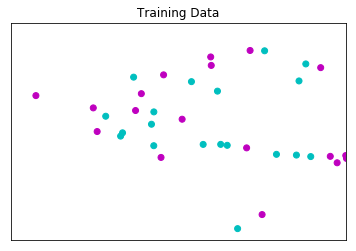

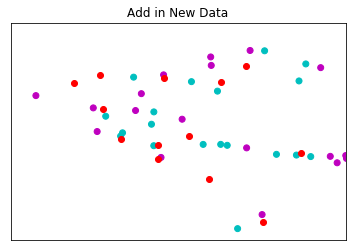

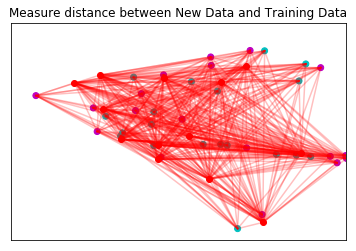

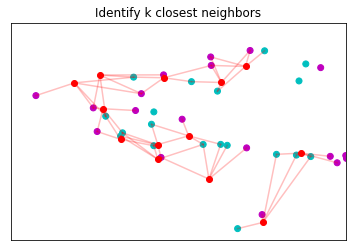

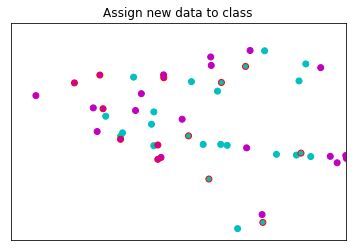

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [15]:
knr.predict(X_test, plotting=True)

In [221]:
%%timeit
knr.score(X_test, y_test)

135 µs ± 8.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
skl_knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
skl_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
%%timeit
skl_knn.score(X_test, y_test)

1.26 ms ± 29.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
knr.score(X_test, y_test), skl_knn.score(X_test, y_test)

(0.965034965034965, 0.965034965034965)